Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "양동훈"
COLLABORATORS = "python"

---

# Exercise: Regression, Interpolation
**강좌**: *Numerical Analysis*

**Due**: 2024/11/20

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Problem #1
Write a function to perform nn-th order regression analysis for a given dataset.

- The function should return the regression coefficients.
- The function should print the correlation coefficient.

In [24]:
# Write your answer
def polyreg(x, y, n):
    """
    Regression for polynomial
    
    Parameters
    ----------
    x : array
        x
    y : array
        y
    n : integer
        order
    
    Returns
    --------
    z : array
        coeffcient of polynomials
    r : float
        correlation coefficient
    """
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)

    for i in range(n+1) :
        b[i] = (sum((x**i)*y))
        for j in range(n+1) :
            A[i, j] = sum(x**(j+i))
    coef = np.linalg.solve(A, b)

    St = sum((y-y.mean())**2)
    poly_fit = 0
    for i in range(len(coef)) :
        poly_fit += coef[i]*x**i
    Sr = sum((y - poly_fit)**2)

    r_square = (St-Sr)/St

    return coef, np.sqrt(r_square)

   
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
x = np.array(range(6))
polyreg(x, y, 2)

(array([2.47857143, 2.35928571, 1.86071429]), np.float64(0.9992544006900369))

In [25]:
## Do not remove
# Same problem of lecture note
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
x = np.array(range(6))
z, r = polyreg(x, y, 2)

# Check your result
assert np.linalg.norm(z - np.array([2.47857143, 2.35928571, 1.86071429])) < 1e-6

## Problem #2
Write a function to perform interpolation using the Lagrange polynomial.:

- Using the function values of $log(x)$ at $x=1,3,4,5,6$, calculate the interpolated value at $x=2$.

- Solve the same problem using Newton's divided difference method and compare the results.

In [31]:
def lagint(xs, fs, x):
    """
    Lagrange Interpolation
    
    Parameters
    ----------
    xs : array
        Data of x
    ys : array
        Data of y
    x: float
        Point to interpolate
    """
    # YOUR CODE HERE
    f = 0
    for xi, fi in zip(xs, fs) :
        Li = 1
        for xj in xs :
            if xj != xi :
                Li *= (x-xj)/(xi-xj)
        
        f += Li*fi
    

    return f


# Interpolate log(2) using divided-difference interpolating polynomial using x=1,3,4,5,6 (save as fdd)
# YOUR CODE HERE
def difference(xi, xj, fi ,fj):
    # 1차 유한 차분
    return (fi - fj) / (xi - xj)
x0, x1, x2, x3, x4 = [1, 3, 4, 5, 6]
f0, f1, f2, f3, f4 = np.log([x0, x1, x2, x3, x4])
df1 = difference(x1, x0, f1, f0)
df2 = difference(x2, x1, f2, f1)
df3 = difference(x3, x2, f3, f2)
df4 = difference(x4, x3, f4, f3)

ddf1 = difference(x2, x0, df2, df1) 
ddf2 = difference(x3, x1, df3, df2)
ddf3 = difference(x4, x2, df4, df3)

dddf1 = difference(x3, x0, ddf2, ddf1) 
dddf2 = difference(x4, x1, ddf3, ddf2)

ddddf1 = difference(x4, x0, dddf2, dddf1)

f = lambda x : f0 + df1*(x-x0) + ddf1*(x-x0)*(x-x1) + dddf1*(x-x0)*(x-x1)*(x-x2) + ddddf1*(x-x0)*(x-x1)*(x-x2)*(x-x3)

fdd = f(2)

In [32]:
## Do not remove
xs = [1, 3, 4, 5, 6]
fs = np.log(xs)

# Interpolate using Lagrange Polynomial
flg = lagint(xs, fs, 2)

# Check your result
assert abs(flg - fdd) < 1e-6

## Problem #3
Hooke’s law, which holds when a spring is not stretched too far, signifies that the extension of the spring and the applied force are linearly related. The proportionality is parameterized by the spring constant $k$. A value for this parameter can be established experimentally by placing known weights onto the spring and measuring the resulting compression. Such data were contained in below table and plotted in below figure. Notice that above a weight $40\times10^4 N$, the linear relationship between the force and displacement breaks down. This sort of behavior is typical of what is termed a “hardening spring.” 

(a) Employ linear regression to determine a value of k for the linear portion of this system. Fit a quadratic polynomial to the nonlinear portion. (yellow region)

| Displacement, m | 0.10 | 0.17 | 0.27 | 0.35 | 0.39 | 0.42 | 0.43 | 0.44 |
|-----------------|------|------|------|------|------|------|------|------|
| Force, $10^4 N$ | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 |

Text(0, 0.5, 'Force, $10^4$ N')

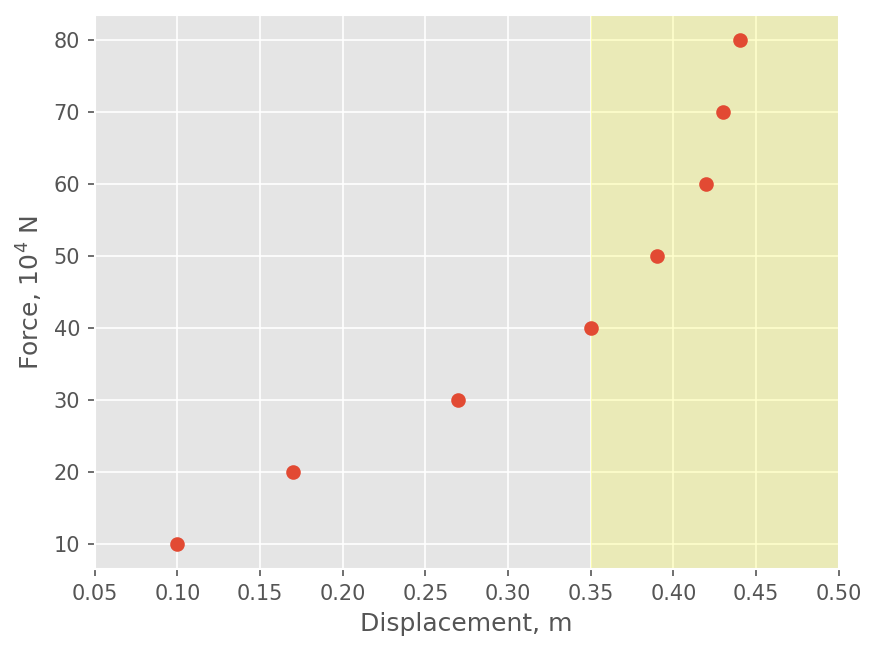

In [33]:
x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
f = np.array([10, 20, 30, 40, 50, 60, 70, 80])

plt.plot(x, f, linestyle='none', marker='o')
plt.axvspan(0.35, 0.5, alpha=0.2, color='yellow')
plt.xlim(0.05, 0.5)
plt.xlabel('Displacement, m')
plt.ylabel('Force, $10^4$ N')

In [41]:
# YOUR CODE HERE
# Quadratic interpolation function name should be saved as 'fhard'.
def polyreg(x, y, n):
   
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)

    for i in range(n+1) :
        b[i] = (sum((x**i)*y))
        for j in range(n+1) :
            A[i, j] = sum(x**(j+i))
    coef = np.linalg.solve(A, b)
    
    return coef

x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
constant_spring_coef = polyreg(x[:4], f[:4], 1)[1]

qudratic_interpolation = polyreg(x[3:], f[3:], 2)
fhard = lambda x : qudratic_interpolation[0] + qudratic_interpolation[1]*x + qudratic_interpolation[2]*x**2

print(constant_spring_coef)
print(fhard(x))

117.1605789110958
[346.63001326 200.00490894  72.74066074  40.55765549  47.6756173
  63.16822935  70.2665554   78.33194247]


In [40]:
## Do not remove
x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
y = fhard(x)

# Check your result
assert abs(f[1] - y[1]) < 182
assert abs(f[3] - y[3]) < 0.6
assert abs(f[6] - y[6]) < 0.3

## Problem #4
Runge’s function is written as:


$$
f(x) = \frac{1}{1 + 25x^2}
$$

(a) Develop a plot of this function for the interval from x = -1 to 1.

(b) Generate and plot the fourth-order Lagrange interpolating polynomial using equispaced function values corresponding to x = -1, -0.5, 0, 0.5, and 1.


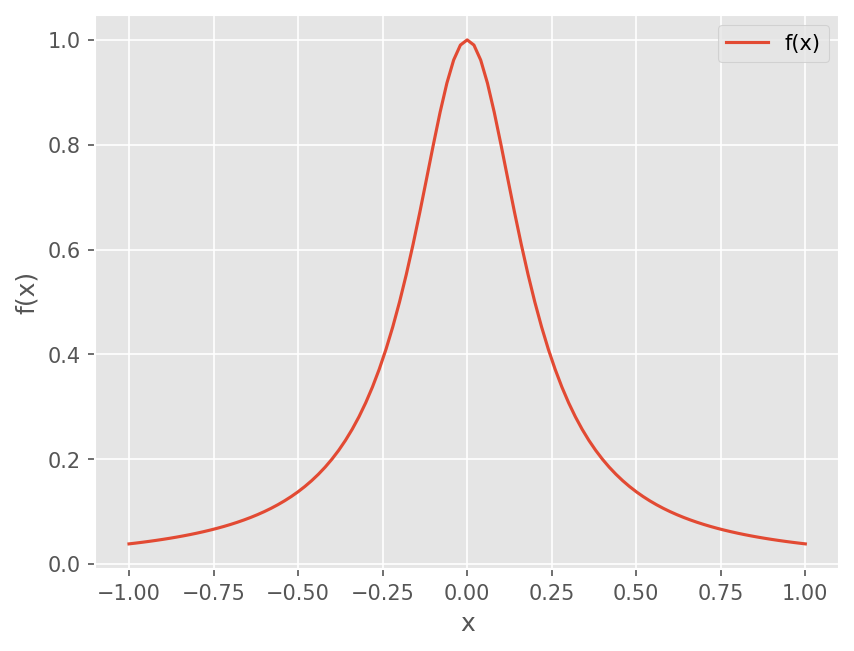

In [62]:
# Write your answer (a)
# YOUR CODE HERE
x = np.linspace(-1, 1, 101)
f = lambda x : 1 /(1+25*x**2)

plt.plot(x, f(x), label = "f(x)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

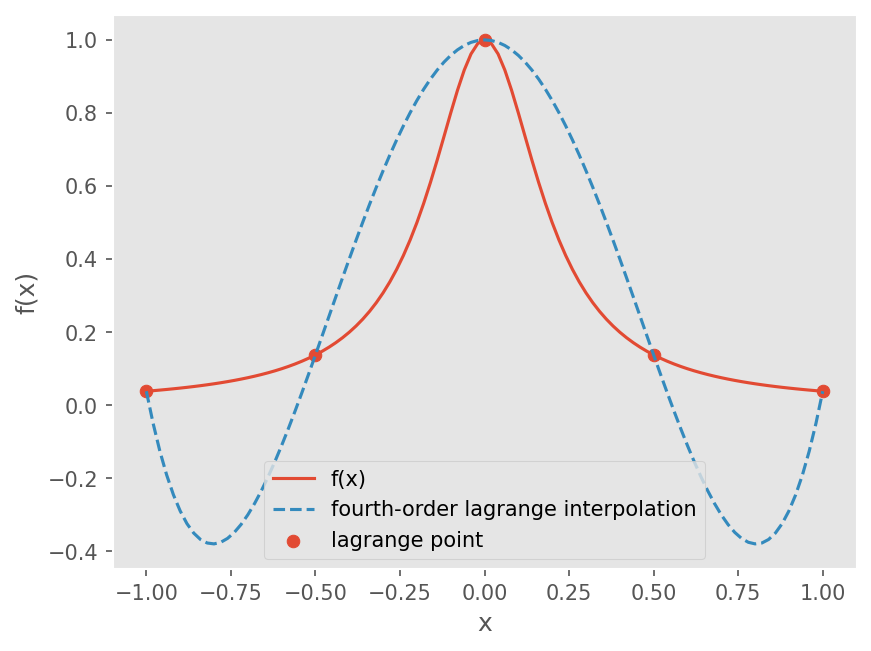

In [63]:
# Write your answer (b)
# YOUR CODE HERE
xis = np.array([-1, -0.5, 0, 0.5, 1])
fis = f(xis)

result_fuction = lagint(xis, fis,x)

plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, result_fuction, linestyle = '--', label = 'fourth-order lagrange interpolation')
plt.scatter(xis, fis, label = 'lagrange point')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

In [56]:
# Do not remove!!
def Runge(x):
    return 1/(1 + 25*x**2)

xis = np.array([-1, -0.5, 0, 0.5, 1])
fis = Runge(xis)
lag = lagint(xis, fis, xis)
